In [1]:
#Reading Input Matrix and the Genes that were used for the Analysis
firstInputMatrix=read.table("firstRandomMatrix.csv",header=TRUE)
geneNames=firstInputMatrix[,1]
head(geneNames)
print(length(geneNames))

[1] CACNG3 COQ6   IFNGR1 DOK1   ZNF610 TM2D2 
500 Levels: ABCG8 ABRA AC011294.3 ACOT11 ACVR1 ACYP1 ADAM19 ADCK4 ... ZSWIM6

[1] 500


In [2]:
firstAdjacencyMatrix=readLines("firstAdjacencyMatrix.mat")

In [3]:
#Filtering out all Comments
firstAdjacencyMatrix=firstAdjacencyMatrix[-1*grep("^>",firstAdjacencyMatrix)]

In [4]:
rowWiseAdjacency=sapply(firstAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    #Filtering out all elements that don't begin with a number
    wordElements=allElements[grep("^[^0-9]",allElements)]
    gene=wordElements[1]
    partners=wordElements[-1]
    #print(gene)
    #print(length(partners))
    adjacencyRowPositions=sapply(partners,function(genePartner){return(which(geneNames==genePartner))})
    numericalRow=rep(0.0,length(geneNames))
    #Getting Number Elements
    numberElements=allElements[grep("^[0-9]",allElements)]
    #Plugging in MI values for the output matrix
    numericalRow[adjacencyRowPositions]= numberElements
    return(numericalRow)
})
colnames(rowWiseAdjacency)=NULL

In [5]:
#Since Genes Pair the pass the cutoff only are returned we can compute an adjacency matrix From that data.
#What I have done is a pretty inefficient implementation and things can be done better. But we will fix this later if we
#need a more efficient algorithm for getting this LogicalMatrix
print(dim(rowWiseAdjacency))

[1] 500 500


In [6]:
allMIData=sapply(firstAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    numberElements=allElements[grep("^[0-9]",allElements)]
    return(numberElements)
})

allMIData=as.numeric(unlist(allMIData))
print(length(allMIData))

[1] 249500


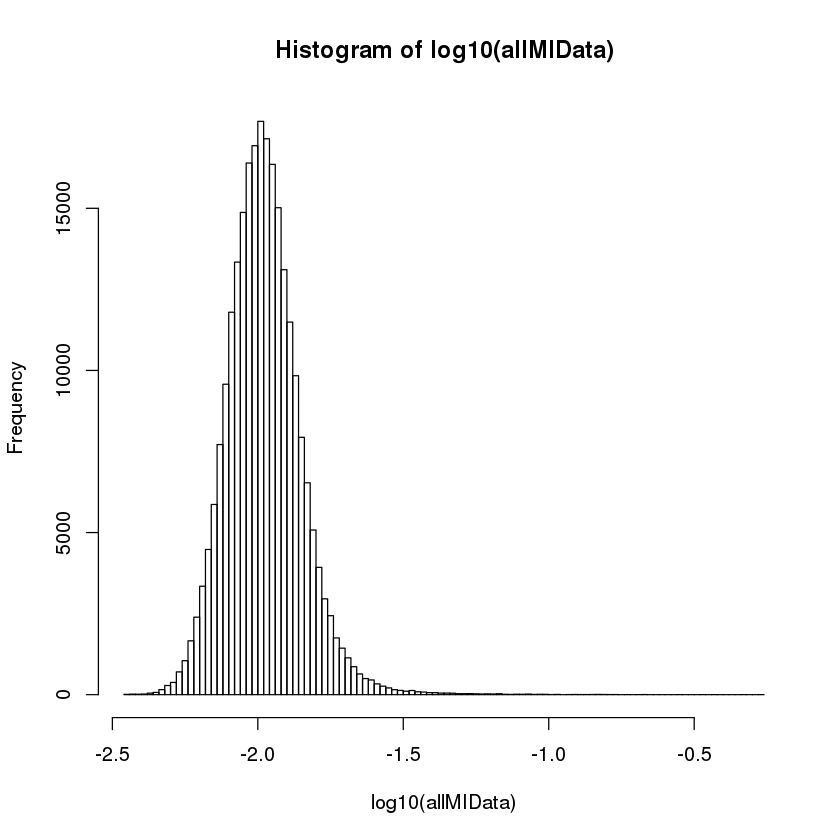

In [7]:
#As you can see this distribution is quite a clean normal or skewed normal. There is not biomodal point where you can cut
# the distribution. Our current statistical methods just do not work over here. Everything fails. Also the MI also used a gaussian kernel
# this is not very encouraging. Also most of my edges are present and the matrix is fully saturated. So even if I take an intersection 
#with another matrix formed from the other split dataset I am still going to get a huge overlap and this is not really an informative metric
#at that point.
hist(log10(allMIData),100)

In [8]:
#Reading Input Matrix and the Genes that were used for the Analysis
secondInputMatrix=read.table("secondRandomMatrix.csv",header=TRUE)
geneNames=secondInputMatrix[,1]
head(geneNames)
print(length(geneNames))

[1] CACNG3 COQ6   IFNGR1 DOK1   ZNF610 TM2D2 
500 Levels: ABCG8 ABRA AC011294.3 ACOT11 ACVR1 ACYP1 ADAM19 ADCK4 ... ZSWIM6

[1] 500


In [9]:
secondAdjacencyMatrix=readLines("secondAdjacencyMatrix.mat")

In [10]:
#Filtering out all Comments
secondAdjacencyMatrix=secondAdjacencyMatrix[-1*grep("^>",secondAdjacencyMatrix)]

In [11]:
rowWiseAdjacency2=sapply(secondAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    #Filtering out all elements that don't begin with a number
    wordElements=allElements[grep("^[^0-9]",allElements)]
    gene=wordElements[1]
    partners=wordElements[-1]
    #print(gene)
    #print(length(partners))
    adjacencyRowPositions=sapply(partners,function(genePartner){return(which(geneNames==genePartner))})
    numericalRow=rep(0.0,length(geneNames))
    #Getting Number Elements
    numberElements=allElements[grep("^[0-9]",allElements)]
    #Plugging in MI values for the output matrix
    numericalRow[adjacencyRowPositions]= numberElements
    return(numericalRow)
})
colnames(rowWiseAdjacency2)=NULL

In [12]:
print(dim(rowWiseAdjacency2))

[1] 500 500


In [13]:
allMIData2=sapply(secondAdjacencyMatrix,function(line){
    allElements=strsplit(line,"\t")[[1]]
    numberElements=allElements[grep("^[0-9]",allElements)]
    return(numberElements)
})

allMIData2=as.numeric(unlist(allMIData2))
print(length(allMIData2))

[1] 249500


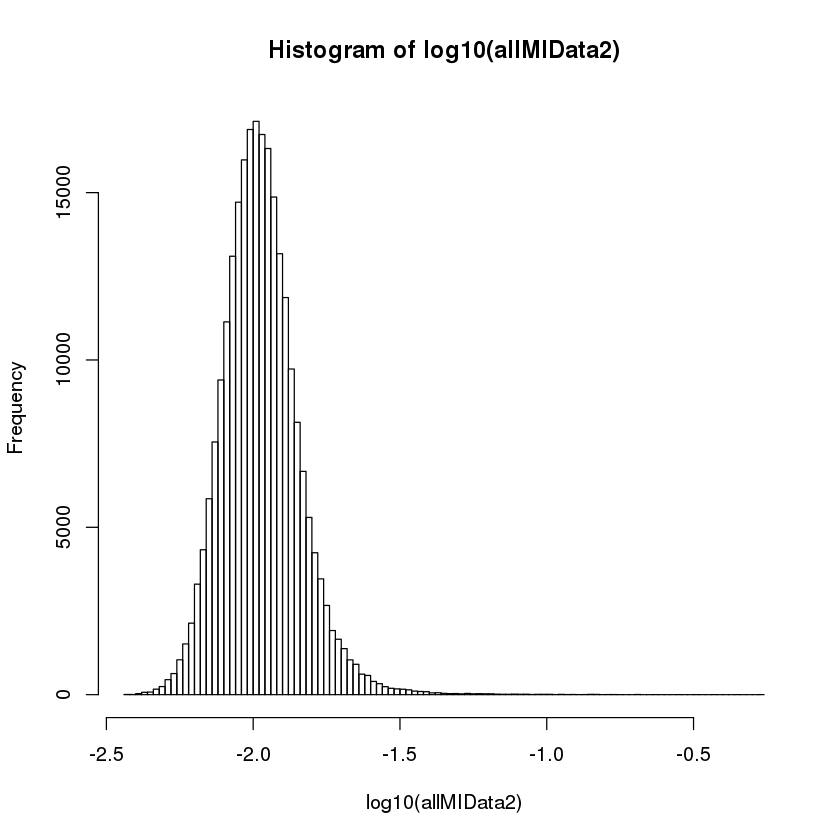

In [14]:
hist(log10(allMIData2),100)

In [15]:
#Printing a Small Portion to See if everything is OK
#Test Sample 1
rowWiseAdjacency[1:10,1:10]

0,0.01470735,0.01369442,0.01676928,0.00829311,0.00967956,0.00698761,0.00889341,0.00963579,0.01136004
0.01470735,0,0.00856861,0.01380993,0.010621,0.01065677,0.01432416,0.00843441,0.00951183,0.00748799
0.01369442,0.00856861,0,0.01313933,0.01145346,0.01166751,0.01493877,0.01065081,0.01219069,0.00741792
0.01676928,0.01380993,0.01313933,0,0.01071272,0.00991486,0.00865816,0.01044166,0.01052864,0.0086361
0.00829311,0.010621,0.01145346,0.01071272,0,0.01070143,0.01263624,0.00934419,0.0118476,0.00609145
0.00967956,0.01065677,0.01166751,0.00991486,0.01070143,0,0.01081065,0.01148118,0.01008777,0.01179794
0.00698761,0.01432416,0.01493877,0.00865816,0.01263624,0.01081065,0,0.01767017,0.00846663,0.00764312
0.00889341,0.00843441,0.01065081,0.01044166,0.00934419,0.01148118,0.01767017,0,0.01014208,0.00917062
0.00963579,0.00951183,0.01219069,0.01052864,0.0118476,0.01008777,0.00846663,0.01014208,0,0.01177045
0.01136004,0.00748799,0.00741792,0.0086361,0.00609145,0.01179794,0.00764312,0.00917062,0.01177045,0


In [16]:
#Printing a Small Portion to See if everything is OK
#Test Sample 2
rowWiseAdjacency2[1:10,1:10]

0,0.00918629,0.01331921,0.00999954,0.01064227,0.00965752,0.01212848,0.01145357,0.01007064,0.00783475
0.00918629,0,0.01292801,0.01022516,0.00568775,0.01060349,0.01722221,0.01108435,0.00871947,0.01118547
0.01331921,0.01292801,0,0.01087448,0.01279082,0.01421423,0.00883243,0.01011262,0.01082649,0.0088858
0.00999954,0.01022516,0.01087448,0,0.00917027,0.00794058,0.00801066,0.01149516,0.01198857,0.00842683
0.01064227,0.00568775,0.01279082,0.00917027,0,0.01027353,0.00736907,0.01483976,0.00805597,0.00782986
0.00965752,0.01060349,0.01421423,0.00794058,0.01027353,0,0.0065895,0.01095355,0.00691465,0.01348513
0.01212848,0.01722221,0.00883243,0.00801066,0.00736907,0.0065895,0,0.00910226,0.00833057,0.01020464
0.01145357,0.01108435,0.01011262,0.01149516,0.01483976,0.01095355,0.00910226,0,0.0127372,0.00784178
0.01007064,0.00871947,0.01082649,0.01198857,0.00805597,0.00691465,0.00833057,0.0127372,0,0.0136142
0.00783475,0.01118547,0.0088858,0.00842683,0.00782986,0.01348513,0.01020464,0.00784178,0.0136142,0


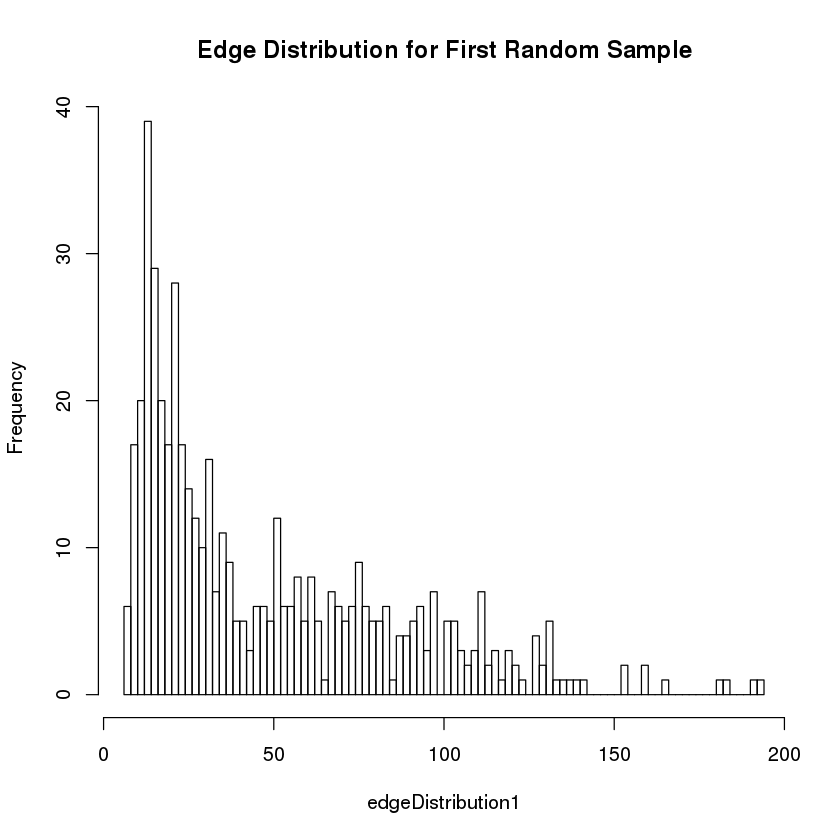

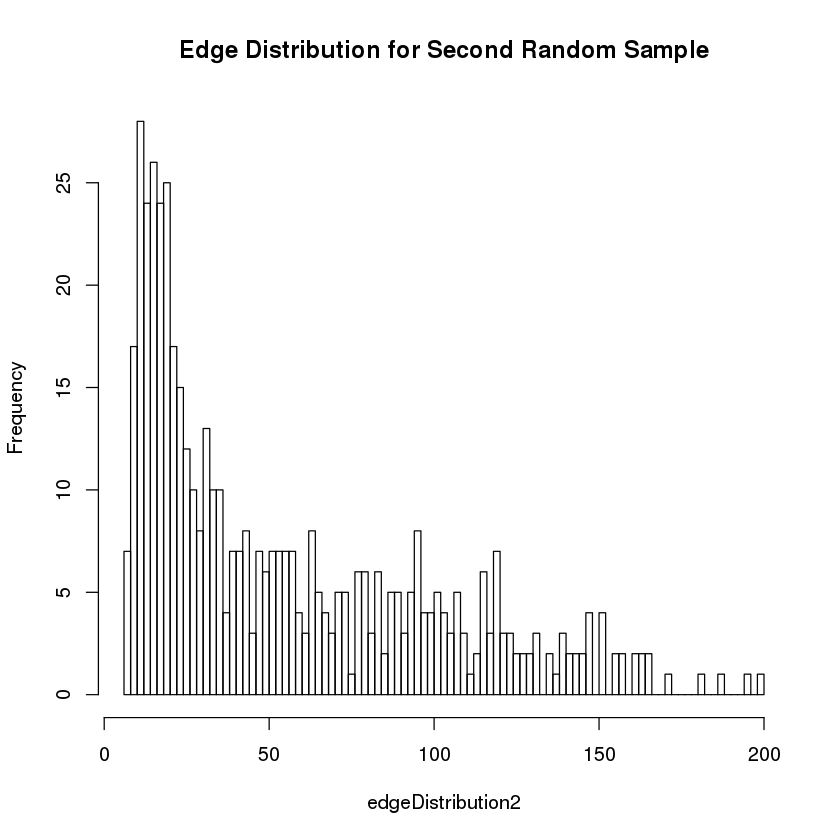

null device 
          1

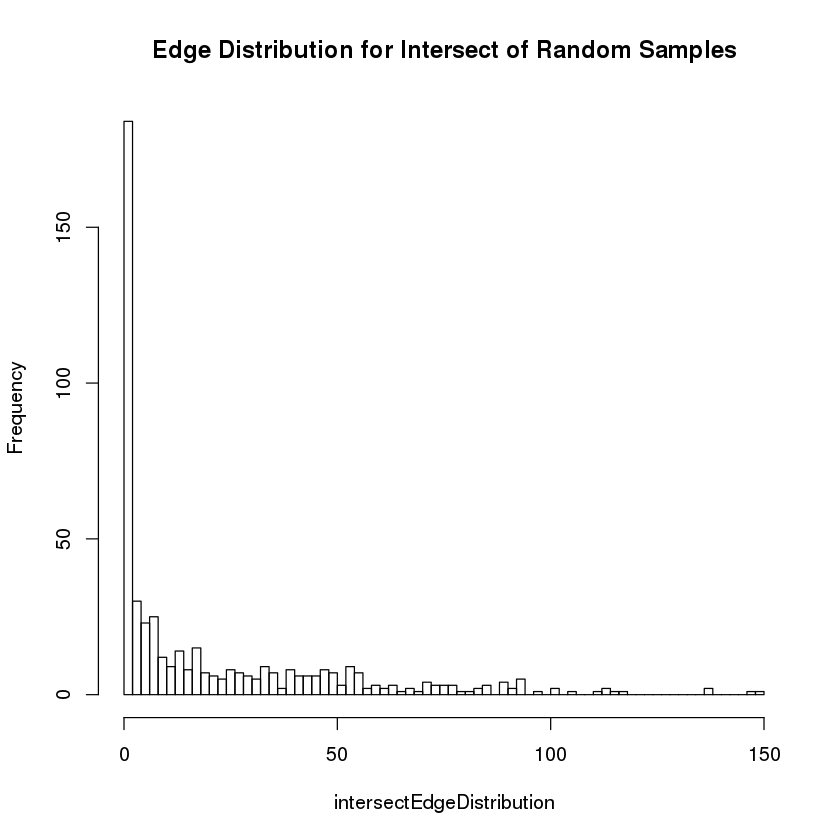

In [17]:
#Theshold is from Histogram. I choose 10^-1.7 with is approximately 0.02
logicalOutput1=(rowWiseAdjacency>=0.015)
diag(logicalOutput1)=FALSE
logicalOutput2=(rowWiseAdjacency2>=0.015)
diag(logicalOutput2)=FALSE
#pdf("Edge_Distribution_Statistics.pdf")
edgeDistribution1=apply(logicalOutput1,2,sum)
hist(edgeDistribution1,100, main = "Edge Distribution for First Random Sample")
edgeDistribution2=apply(logicalOutput2,2,sum)
hist(edgeDistribution2,100, main = "Edge Distribution for Second Random Sample")

#Getting Intersection of both outputs
intersectofOutputs=((logicalOutput1+logicalOutput2)>1)
diag(intersectofOutputs)=FALSE

intersectEdgeDistribution=apply(intersectofOutputs,2,sum)
hist(intersectEdgeDistribution,100, main = "Edge Distribution for Intersect of Random Samples")
dev.off()

In [18]:
print("Sparsity for Random Sample 1:")
sparsity1=sum(logicalOutput1)/(nrow(logicalOutput1)*ncol(logicalOutput1))
print(sparsity1)
print("Sparsity for Random Sample 2:")
sparsity2=sum(logicalOutput2)/(nrow(logicalOutput2)*ncol(logicalOutput2))
print(sparsity2)
print("Sparsity for Intersect of Random Samples:")
intersectSparsity=sum(intersectofOutputs)/(nrow(intersectofOutputs)*ncol(intersectofOutputs))
print(intersectSparsity)

[1] "Sparsity for Random Sample 1:"
[1] 0.097728
[1] "Sparsity for Random Sample 2:"
[1] 0.109472
[1] "Sparsity for Intersect of Random Samples:"
[1] 0.043584
